In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df_raw = pd.read_csv('dat/online_shoppers_intention.csv.gz')
print (df_raw.shape)
print (df_raw.columns)
df_raw.head()

(12330, 18)
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [143]:
print (df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [3]:
df_raw.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

Let's separate the test set in the very beginning, and never use it till the very end. 10% gives us 190 samples for the rare class, it should be enough.

In [4]:
from sklearn.model_selection import train_test_split
df, df_test = train_test_split(df_raw, test_size=0.1, stratify=df_raw.Revenue, random_state=42)
print ('df shape:', df.shape)
print ('df_test shape:', df_test.shape)

df shape: (11097, 18)
df_test shape: (1233, 18)


## Task 1 - Classification

#### 1.1 EDA


In [5]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    11097.000000             11097.000000   11097.000000   
mean         2.315310                80.702285       0.504461   
std          3.309821               176.632641       1.280012   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 8.000000       0.000000   
75%          4.000000                92.833333       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            11097.000000    11097.000000             11097.000000   
mean                34.458648       31.546634              1188.251018   
std                141.020772       43.637604              1891.000234   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               183.708333   
50%                  0.000000       18.000000               599.000000   
75%                  0.000000       38.000000              1471.858333   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  11097.000000  11097.000000  11097.000000  11097.000000   
mean       0.022272      0.043206      5.894389      0.062179   
std        0.048535      0.048631     18.654673      0.200535   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003125      0.025305      0.000000      0.000000   
75%        0.017188      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      11097.000000  11097.000000  11097.000000  11097.000000  
mean           2.128503      2.362981      3.157069      4.069208  
std            0.918191      1.733921      2.400531      4.020483  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

                                             |          | [  0%]   00:00 -> (? left)


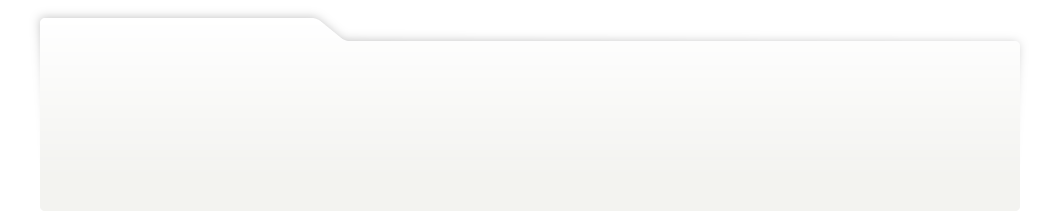
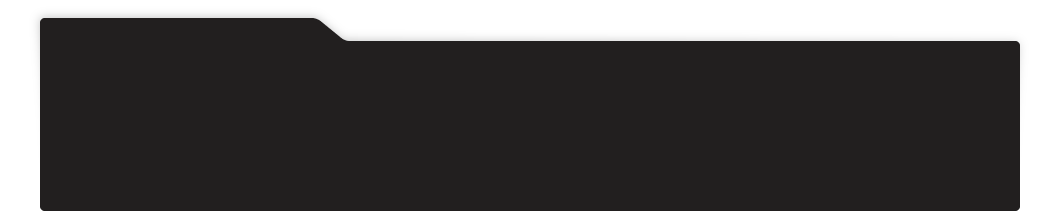
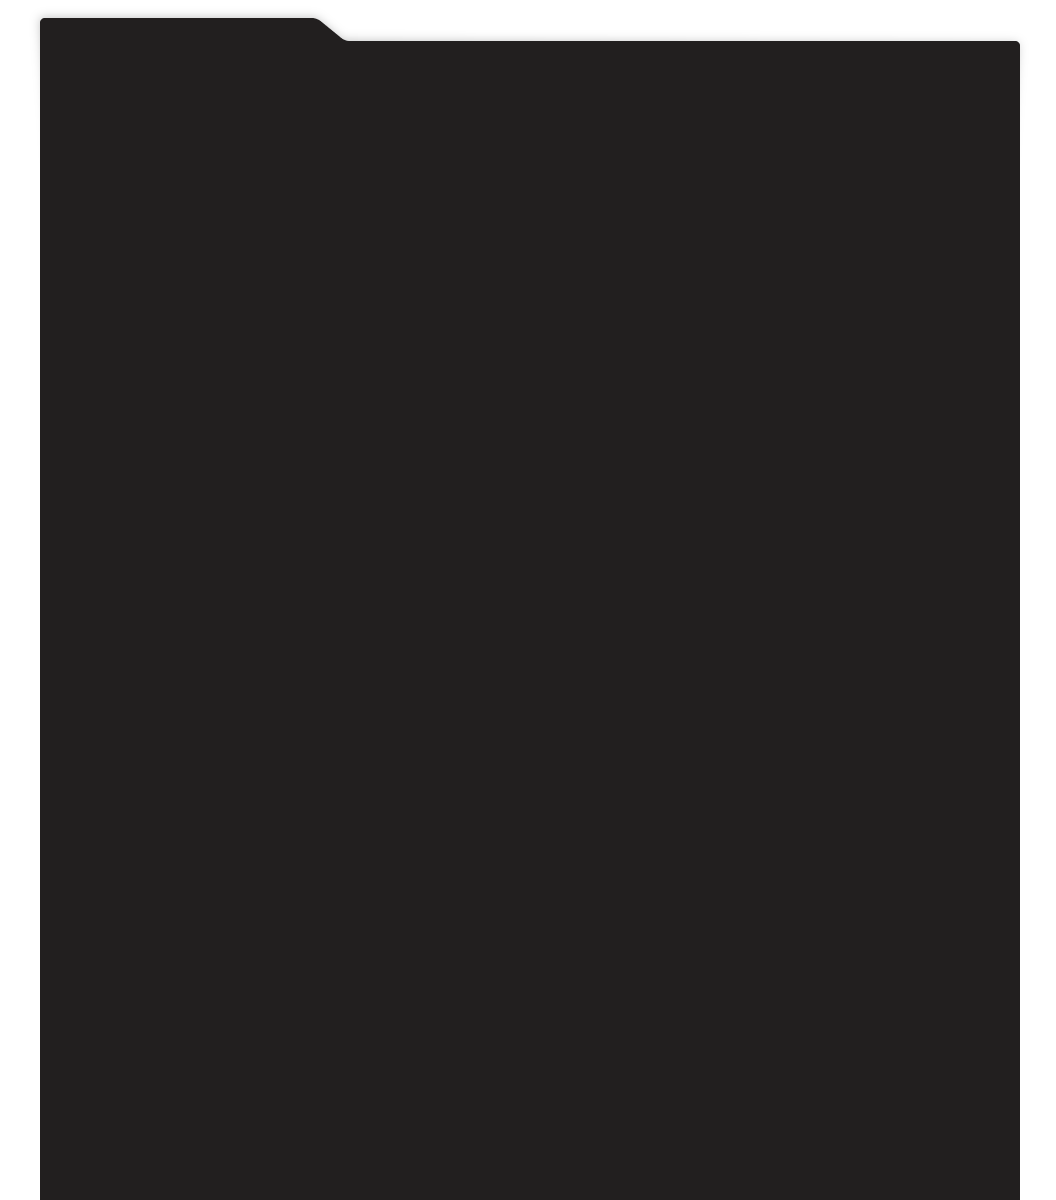
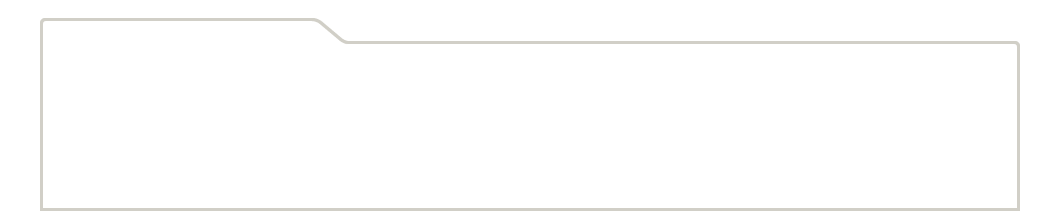
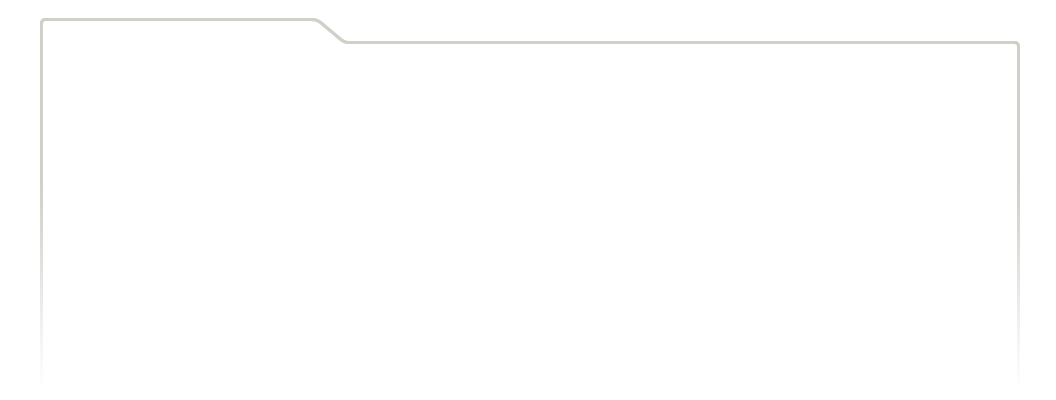
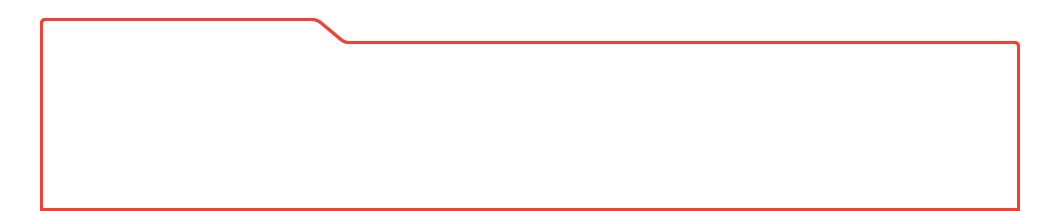
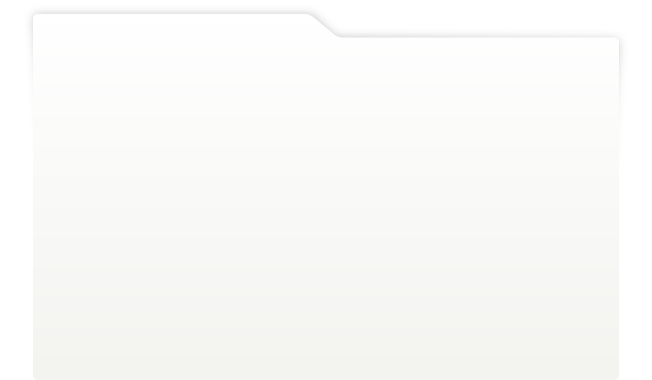
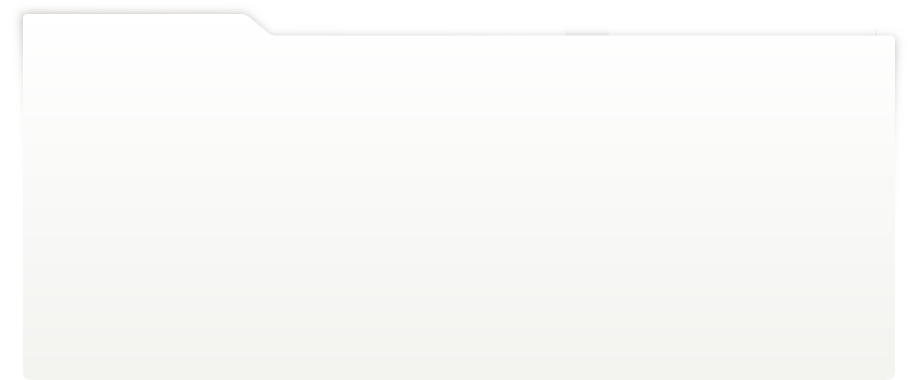
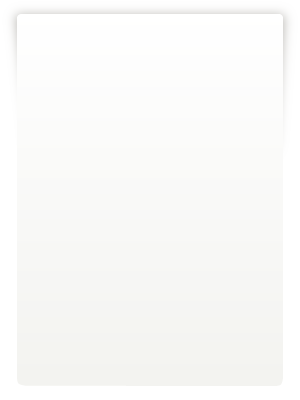
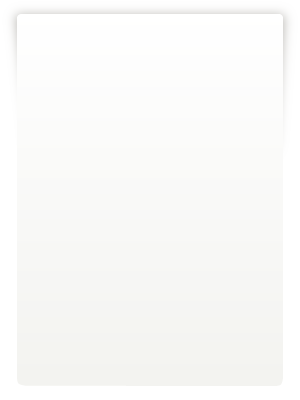
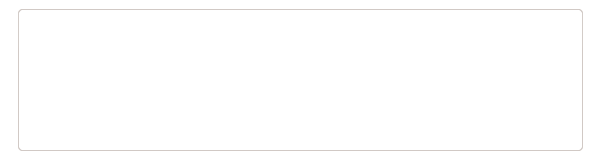
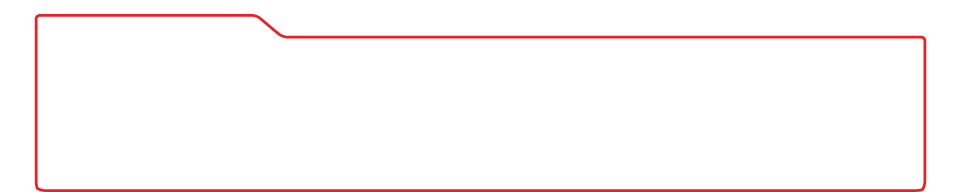
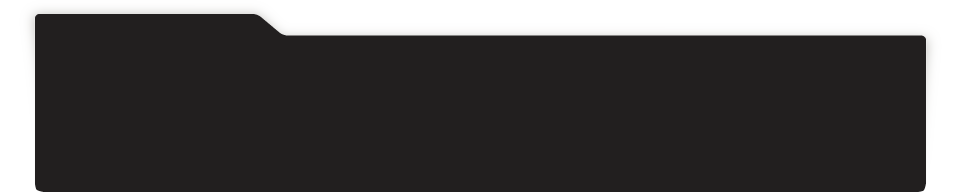
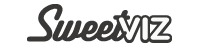
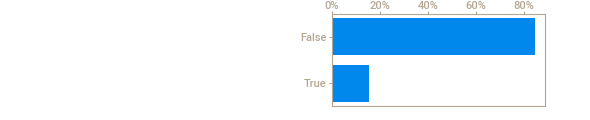
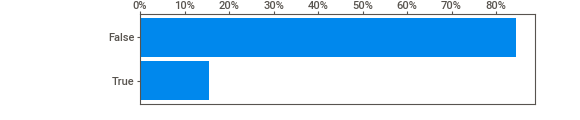
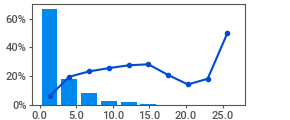
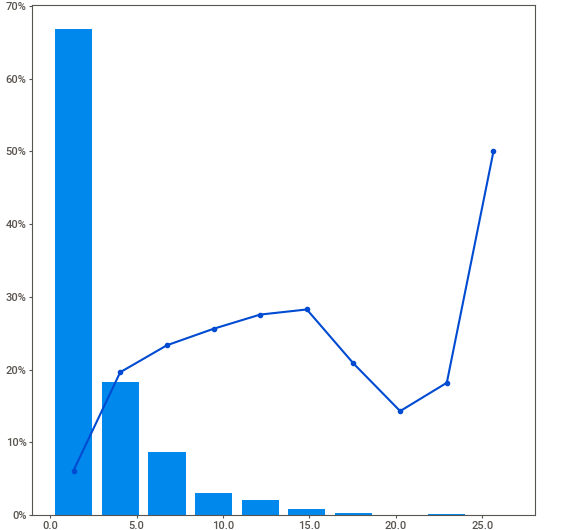
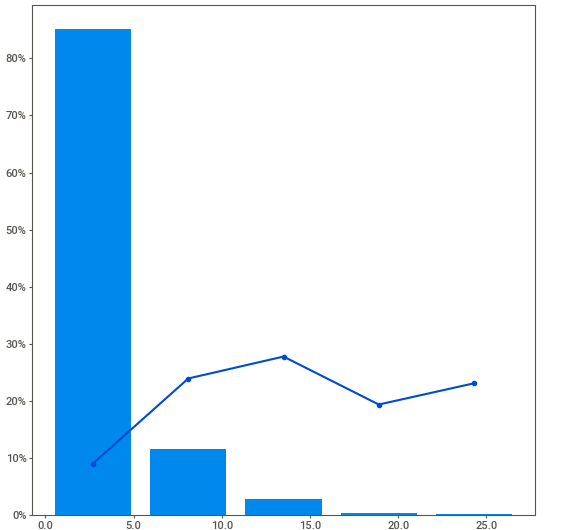
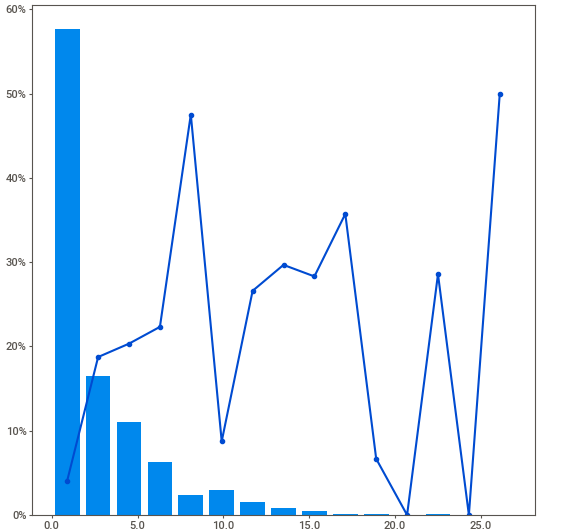
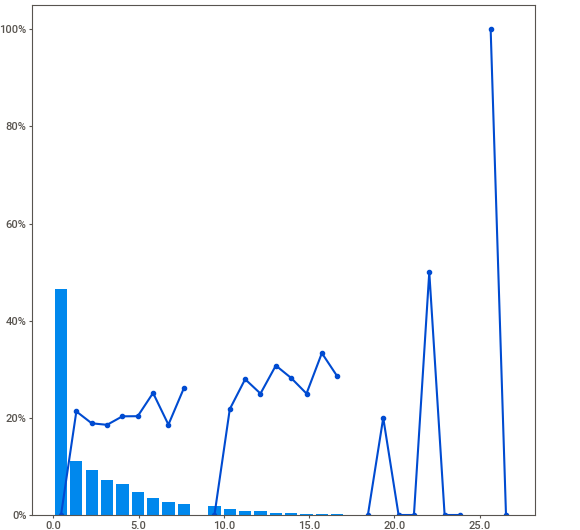
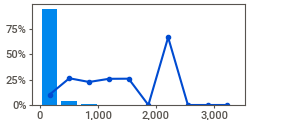
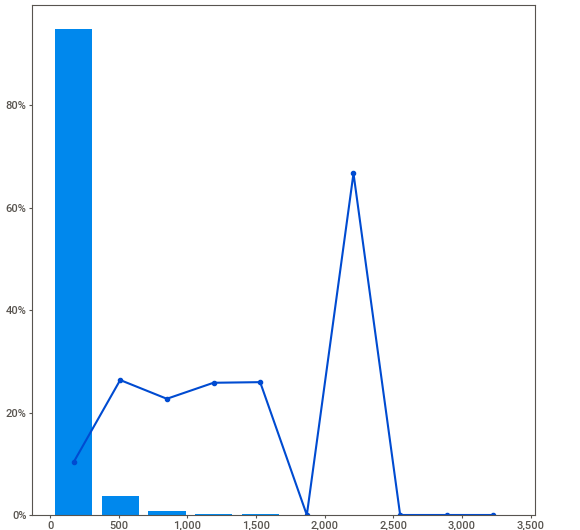
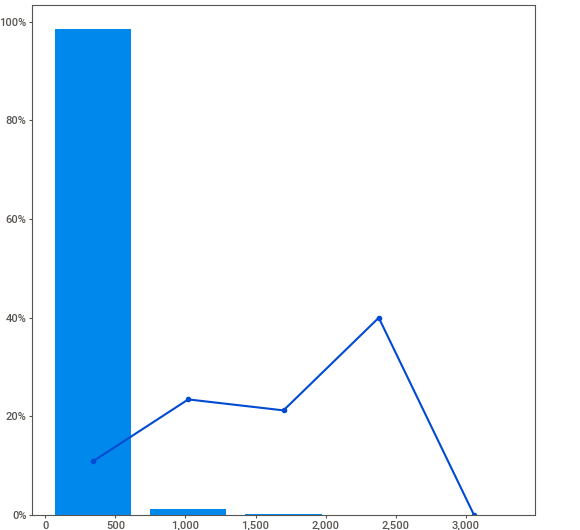
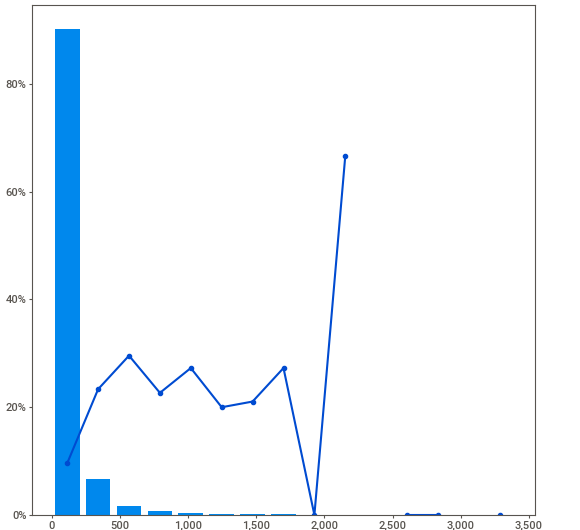
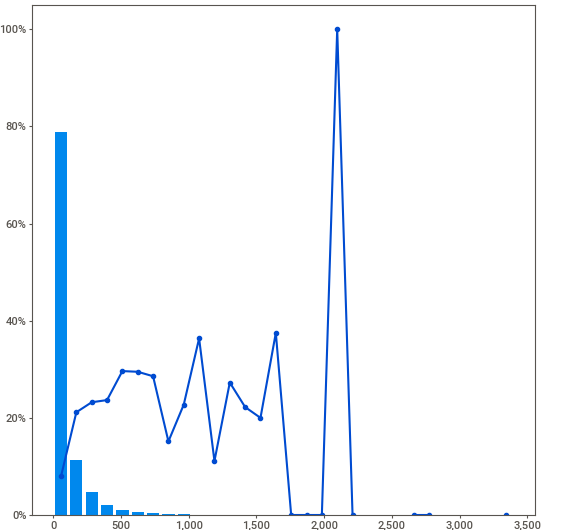
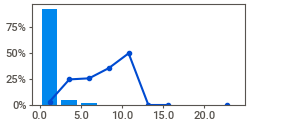
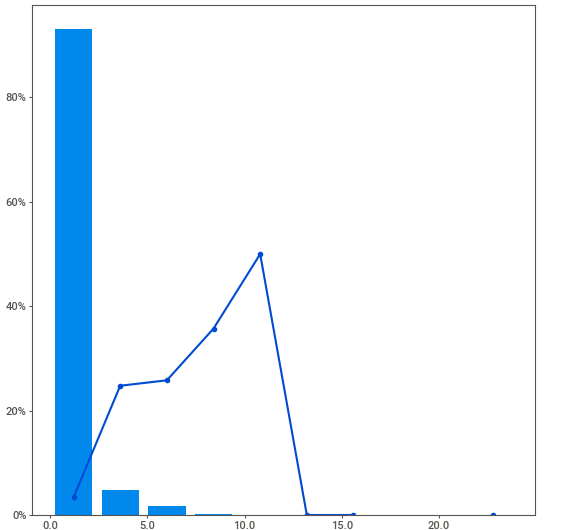
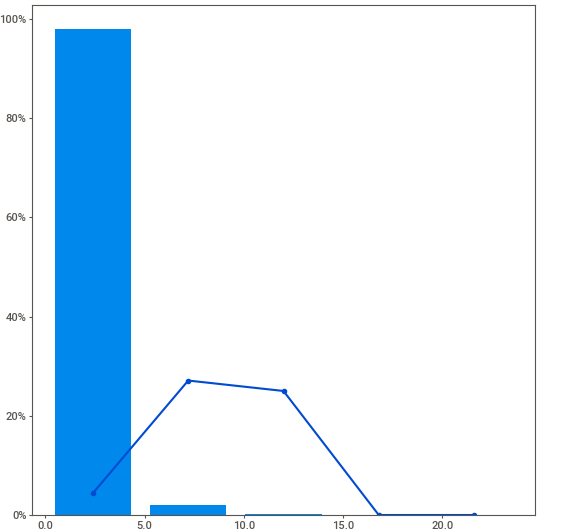
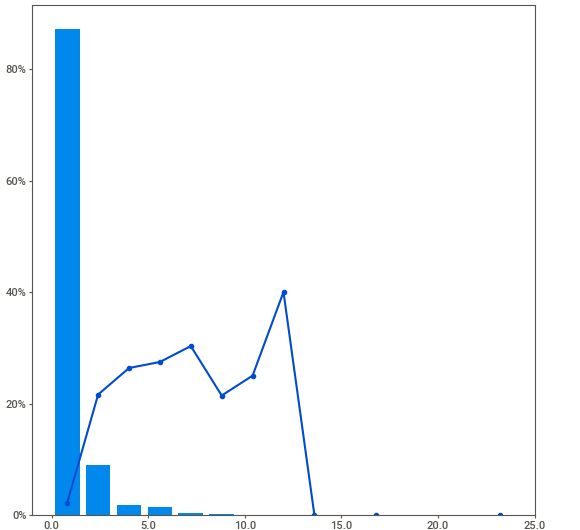
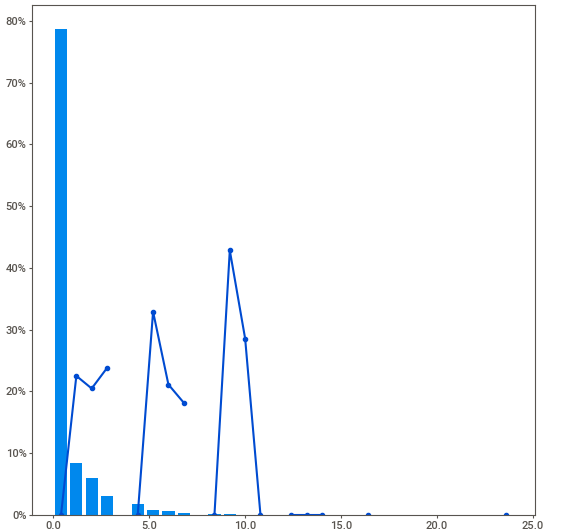
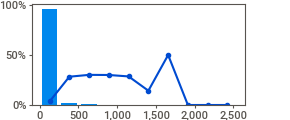
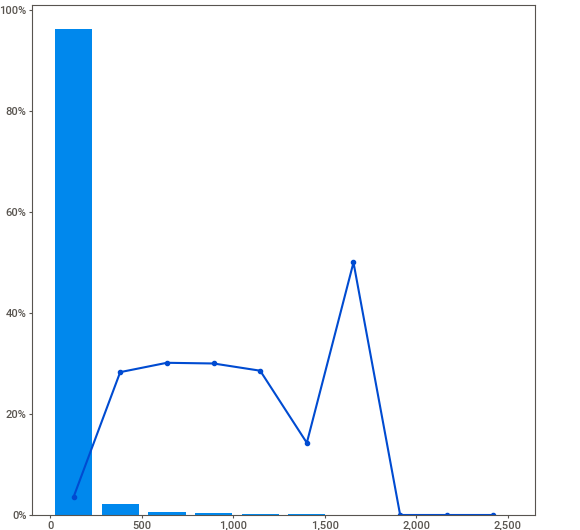
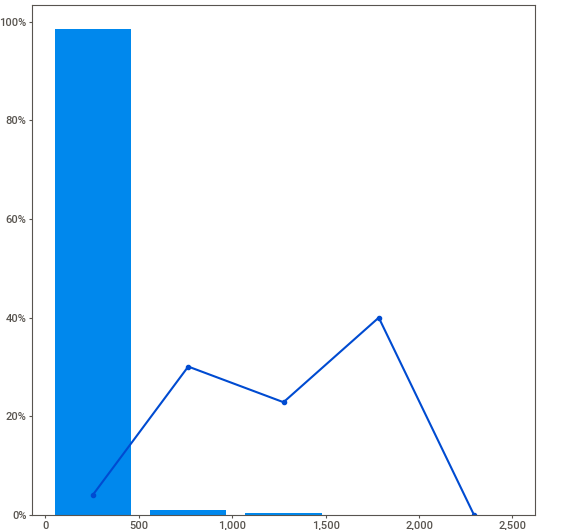
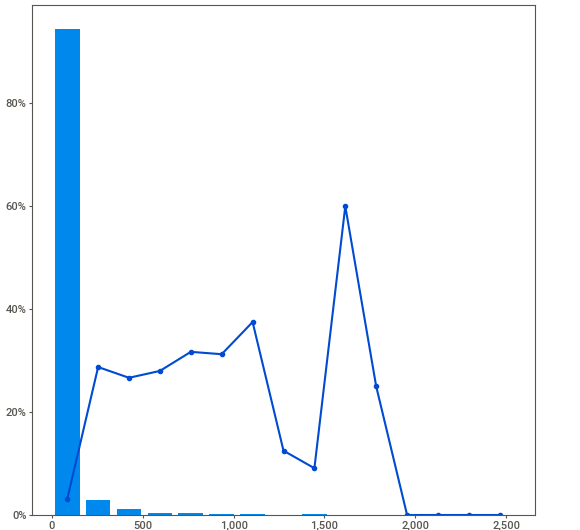
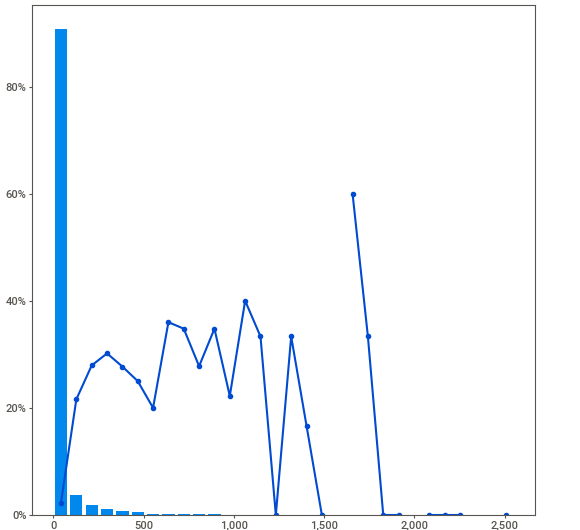
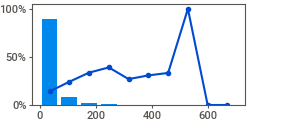
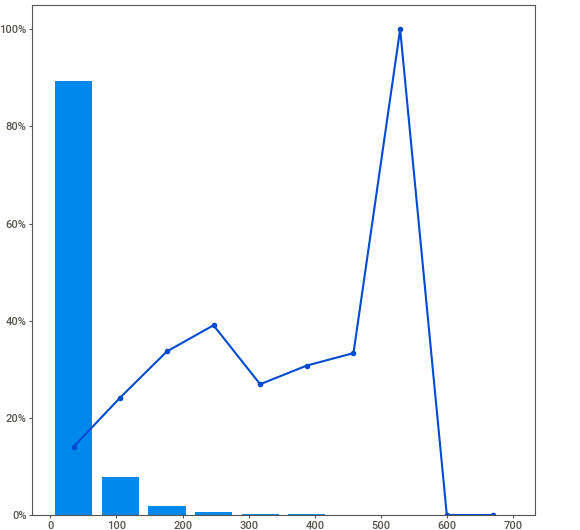
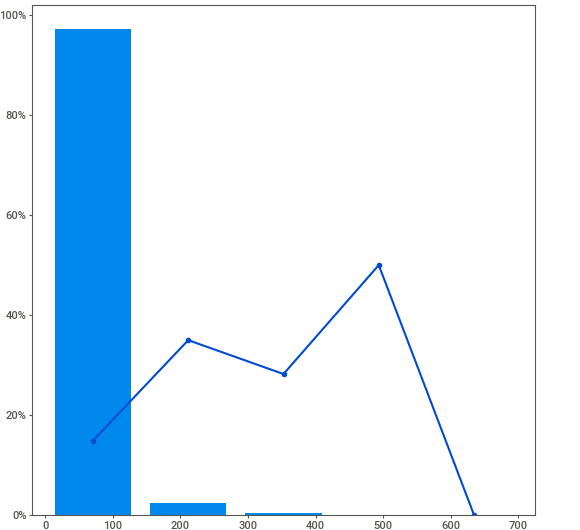
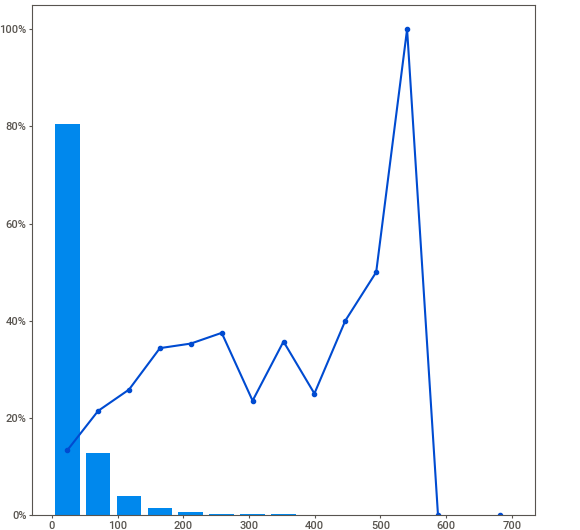
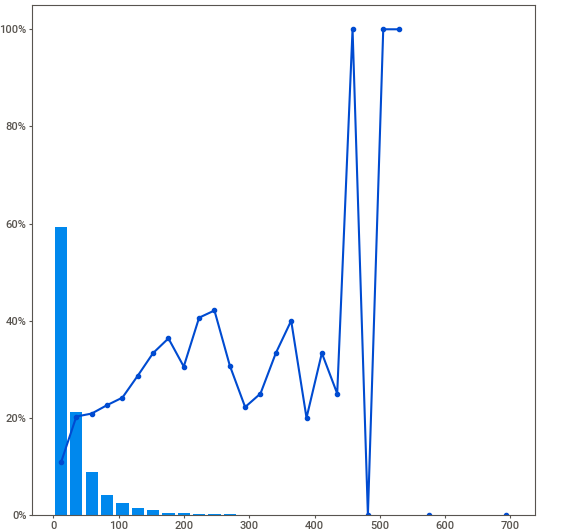
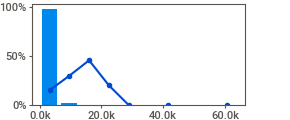
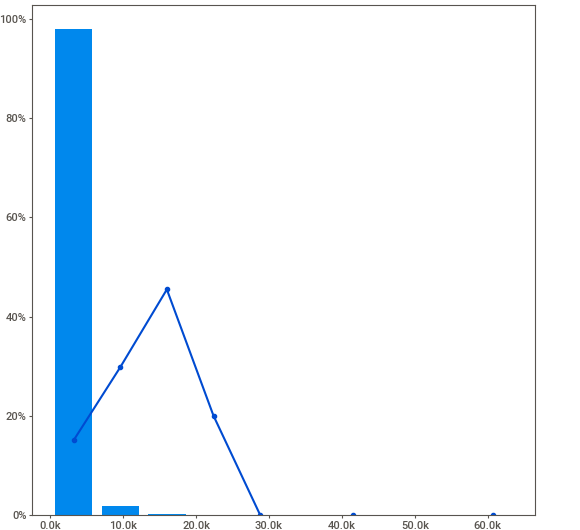
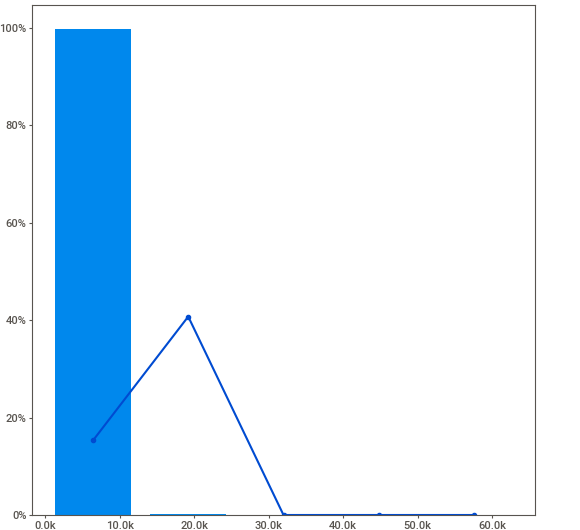
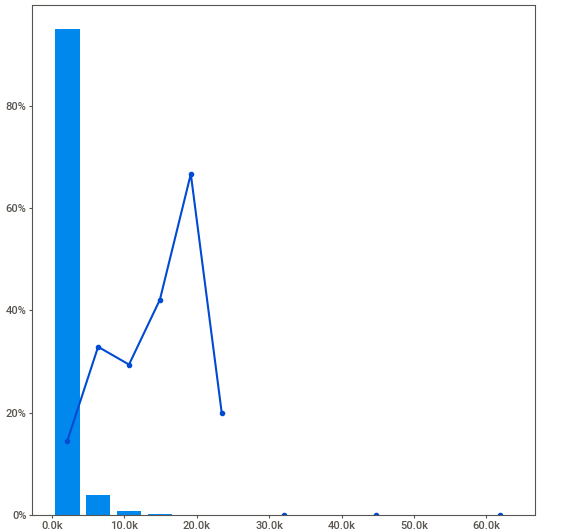
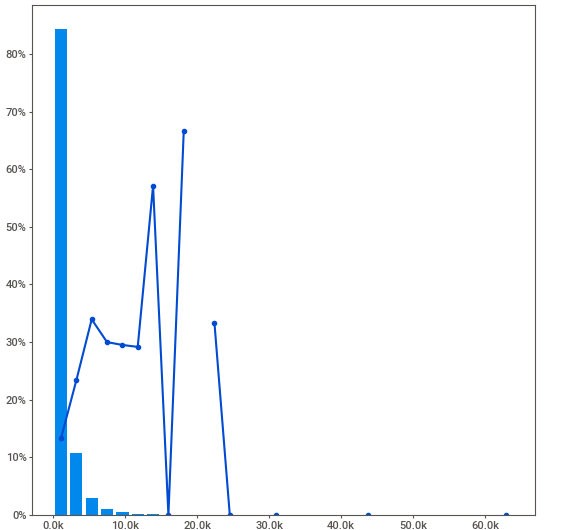
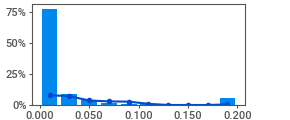
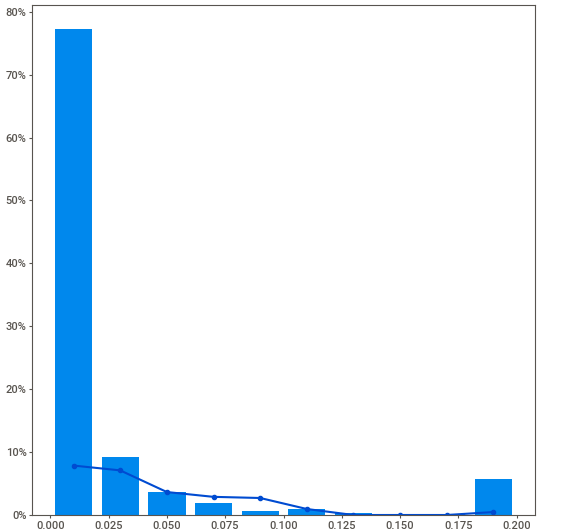
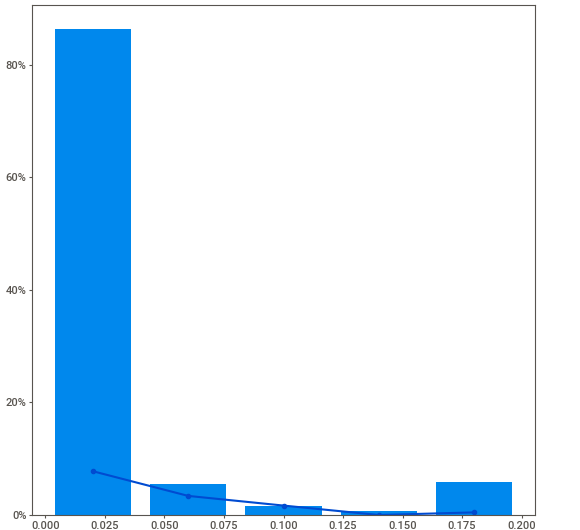
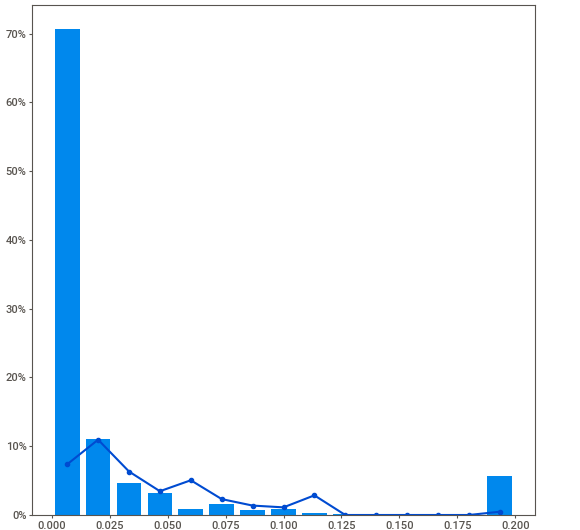
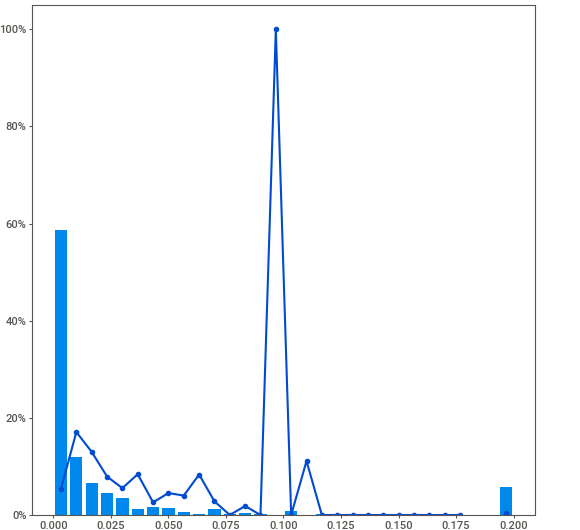
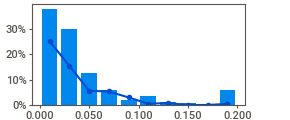
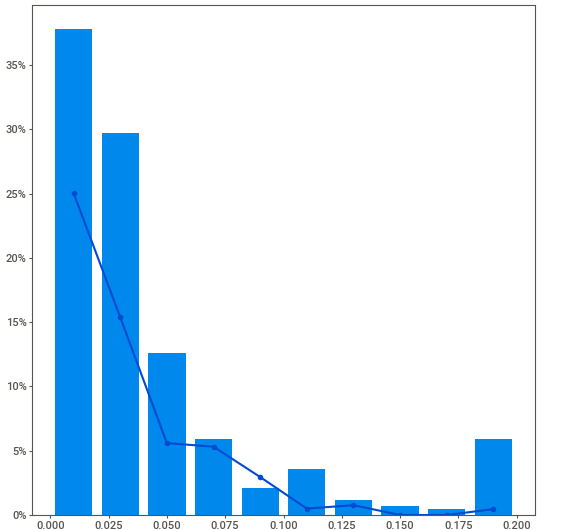
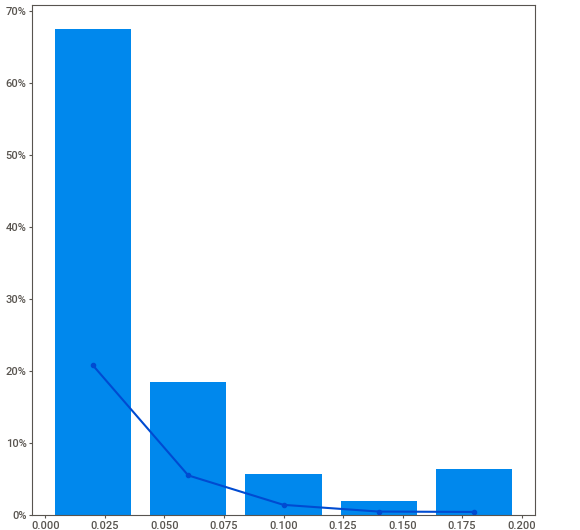
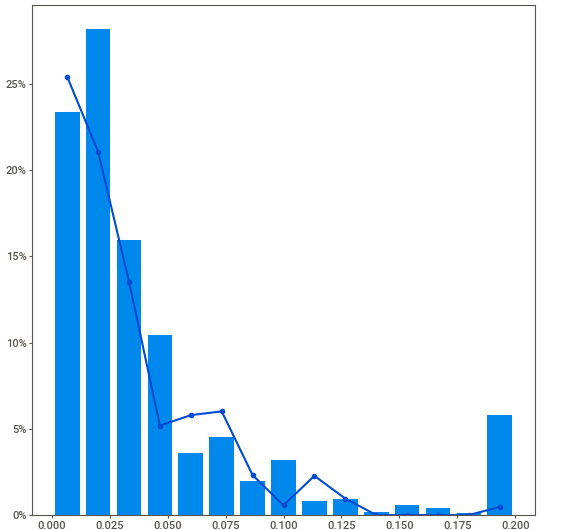
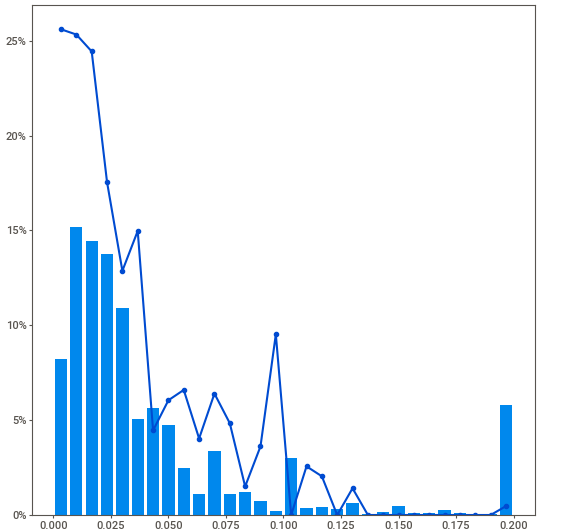
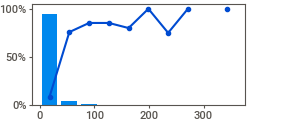
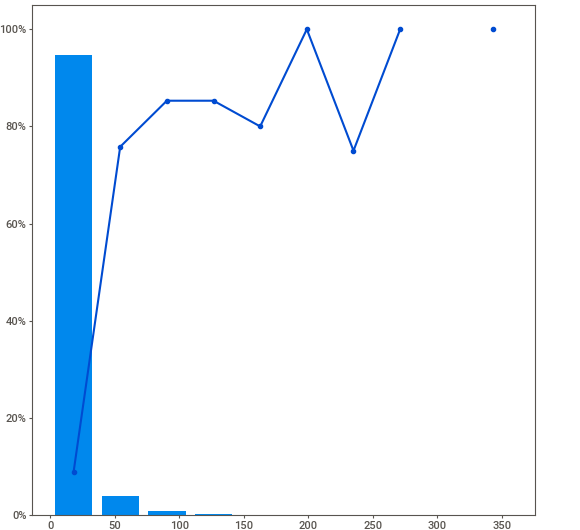
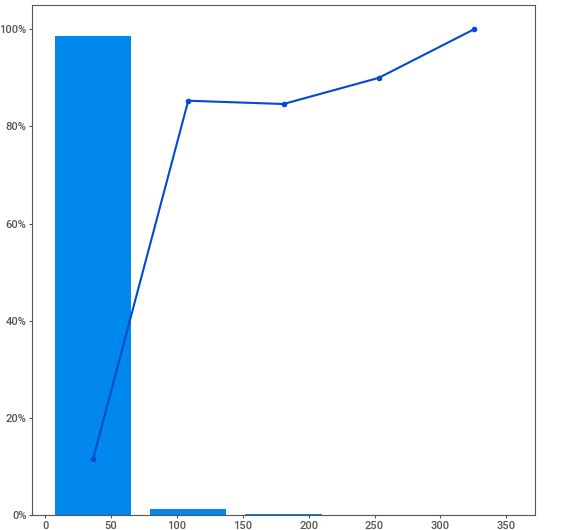
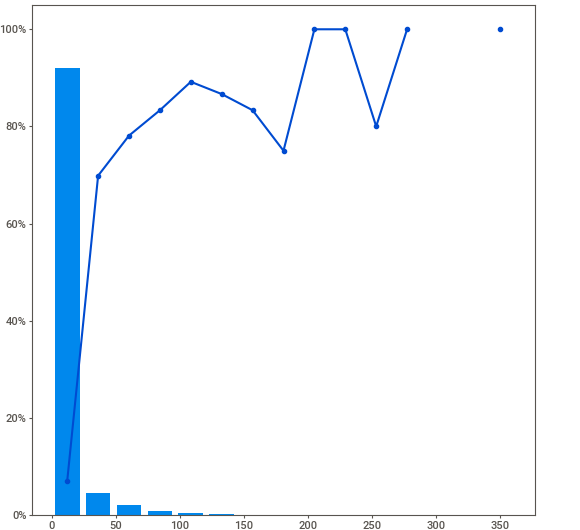
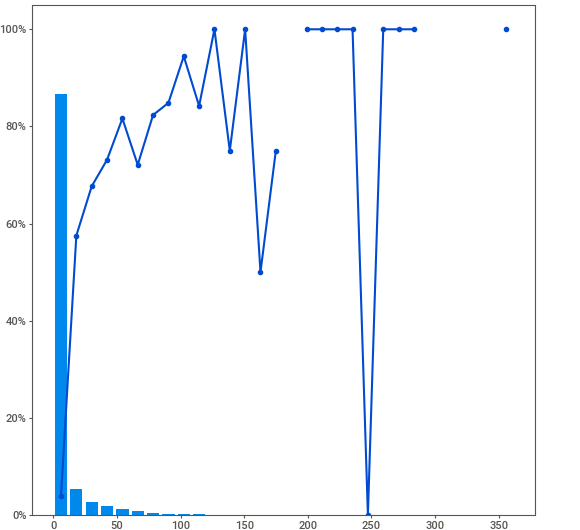
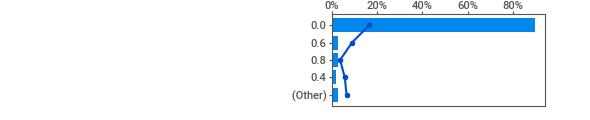
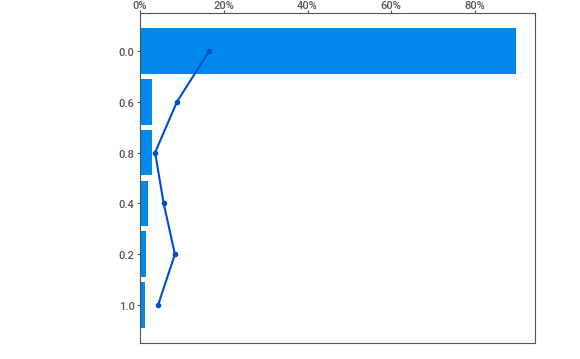
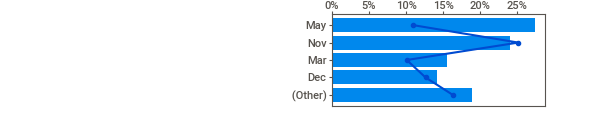
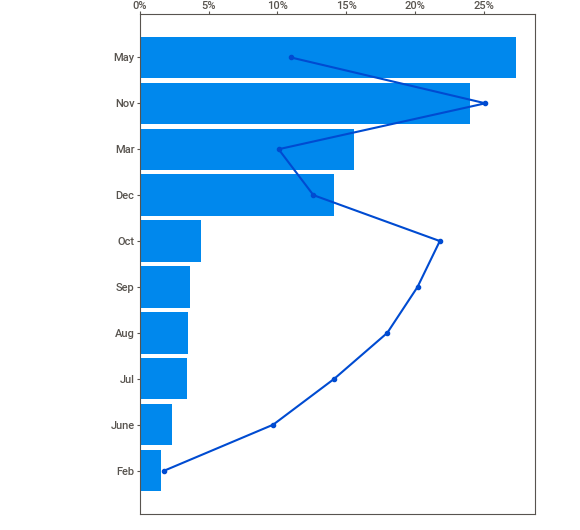
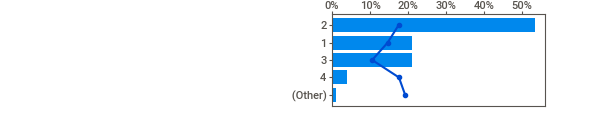
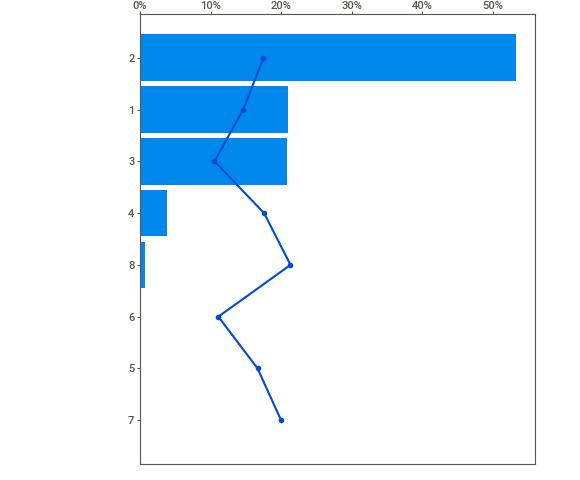
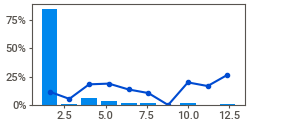
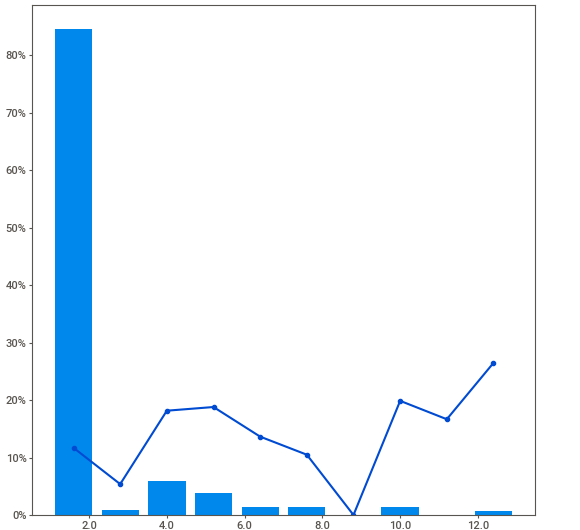
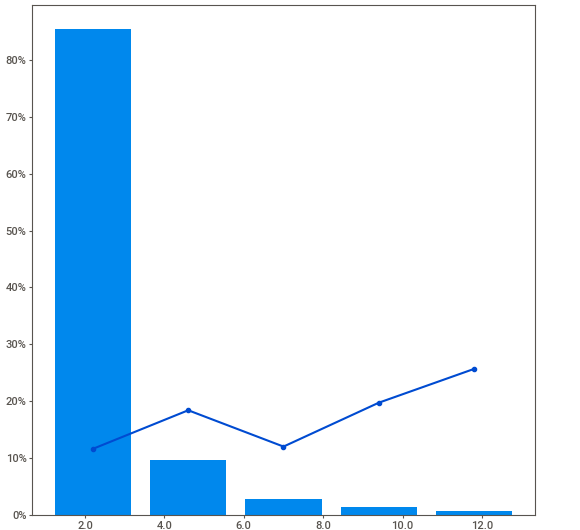
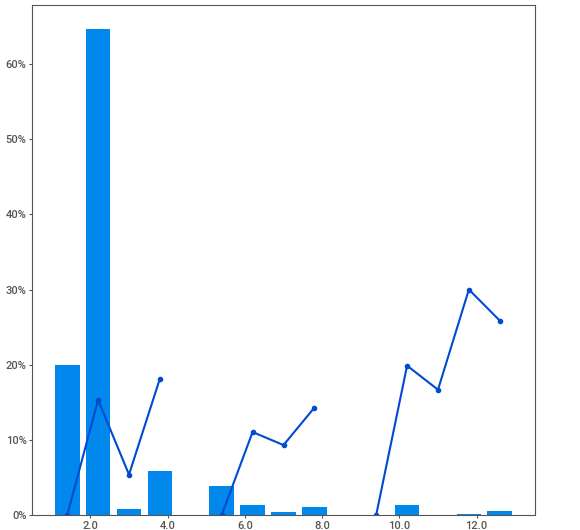
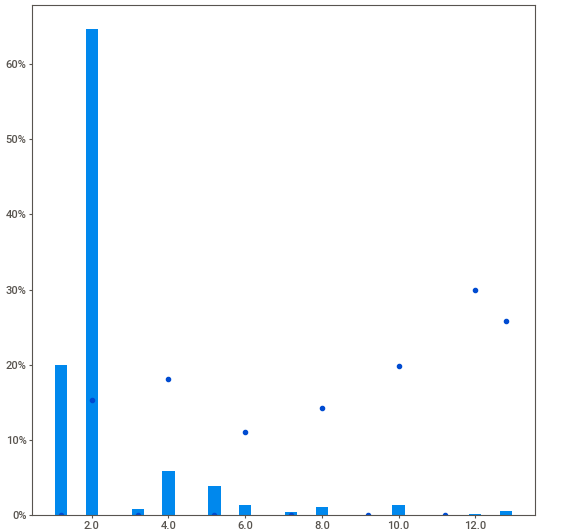
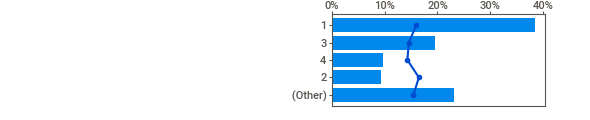
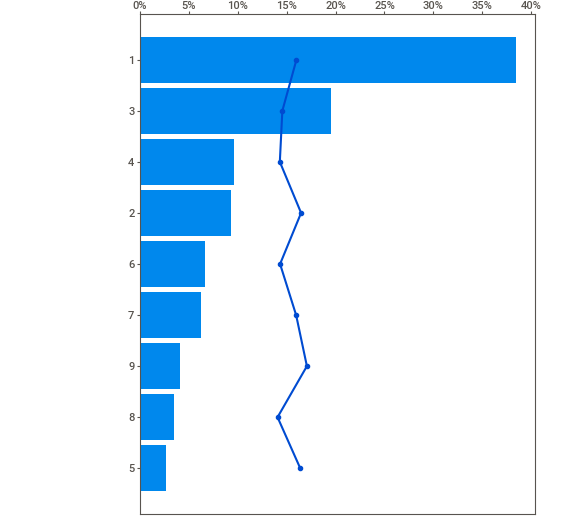
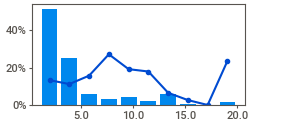
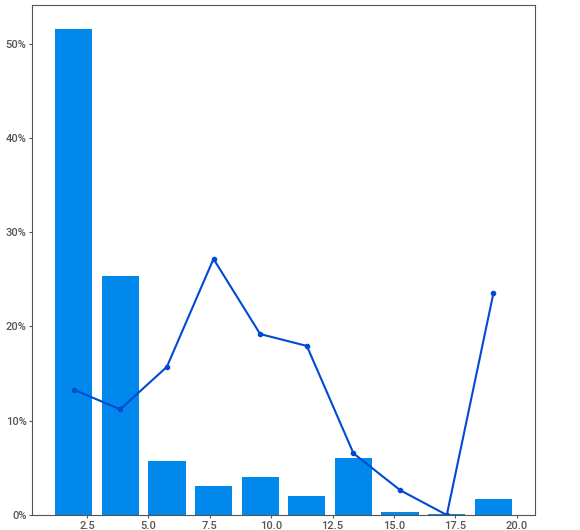
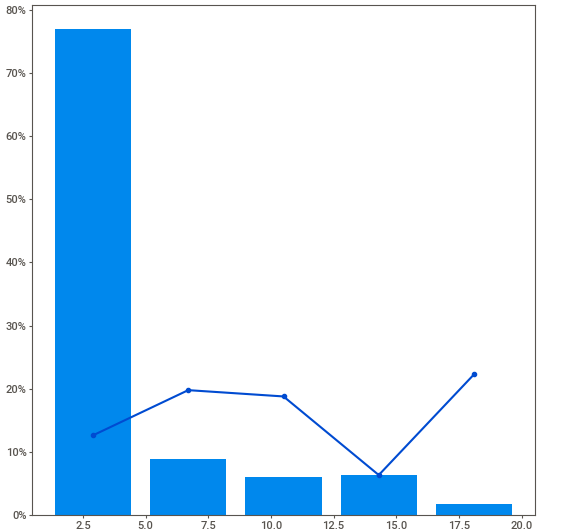
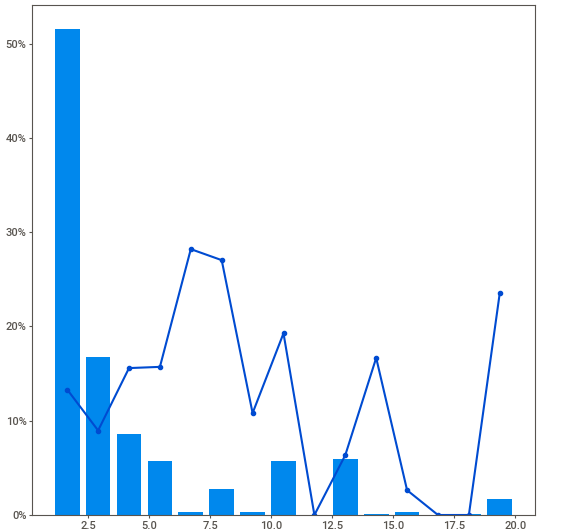
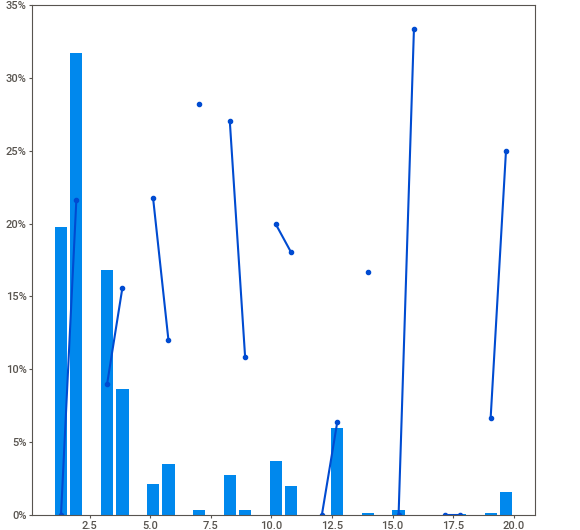
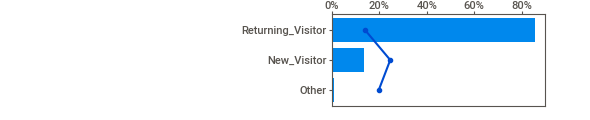
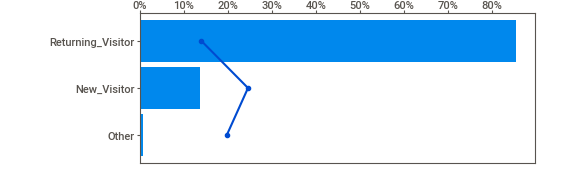
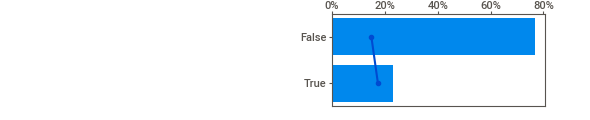
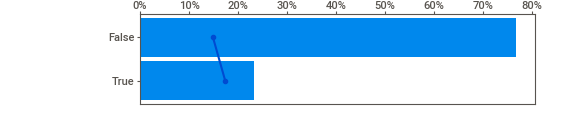
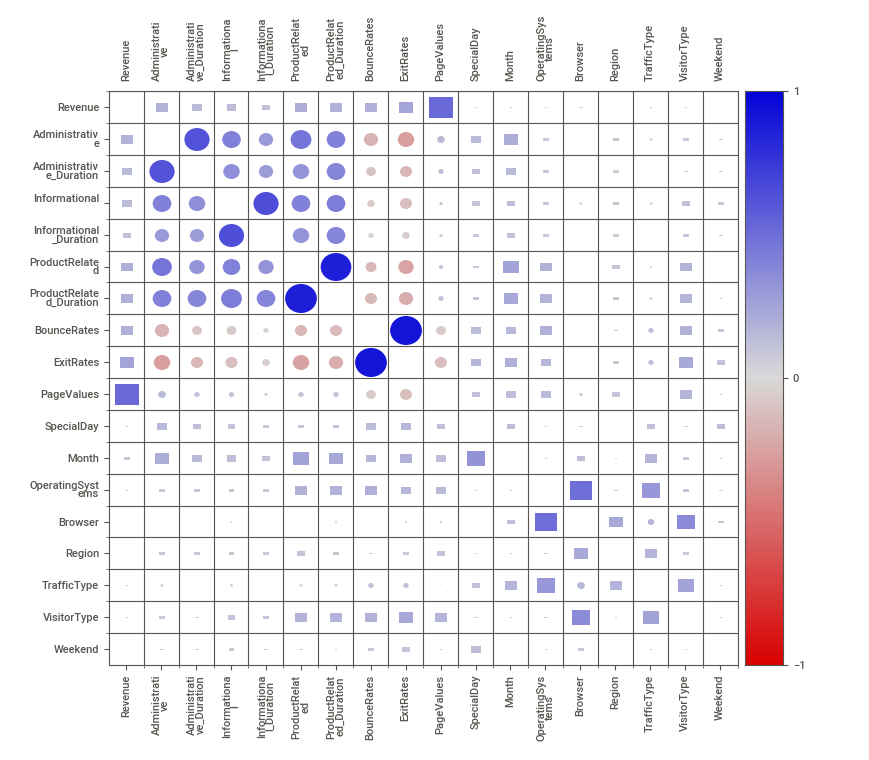
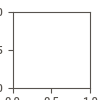

In [8]:
import sweetviz as sv

orig_data_report = sv.analyze(df, target_feat = 'Revenue')
orig_data_report.show_notebook()

#### 1.2. Advanced EDA
*Note: Sweetviz turned out to be extremely informative for this dataset. I'll add some more analysis as it is required in the assignment, but I am good with Sweetviz results.*

<AxesSubplot:>

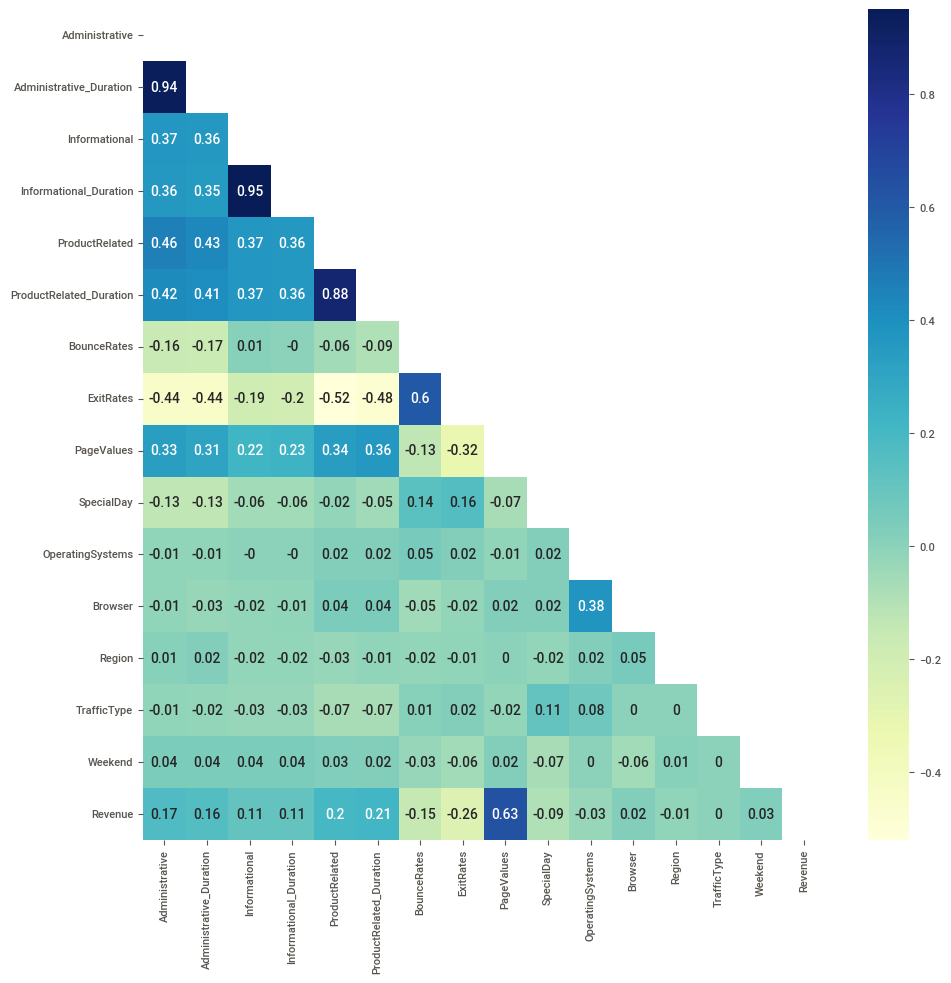

In [9]:
f = plt.figure(figsize=(11, 11))
corr = df.corr(method='spearman').round(2)

sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool)), cmap="YlGnBu", annot=True)

In [10]:

# First let's try to separate numerical and categorical features
numerical = [
    'Administrative', 'Administrative_Duration', 
    'Informational', 'Informational_Duration', 
    'ProductRelated', 'ProductRelated_Duration',
     'BounceRates', 'ExitRates', 'PageValues',
    ]
categorical = [
    'Browser', 'Month', 'Region', 'OperatingSystems', 'SpecialDay', 'VisitorType', 'Weekend'
]
label = 'Revenue'

# Sanity check - Should not print anything
for c in [label] + categorical + numerical:
    if not (c in df.columns):
        print (c)


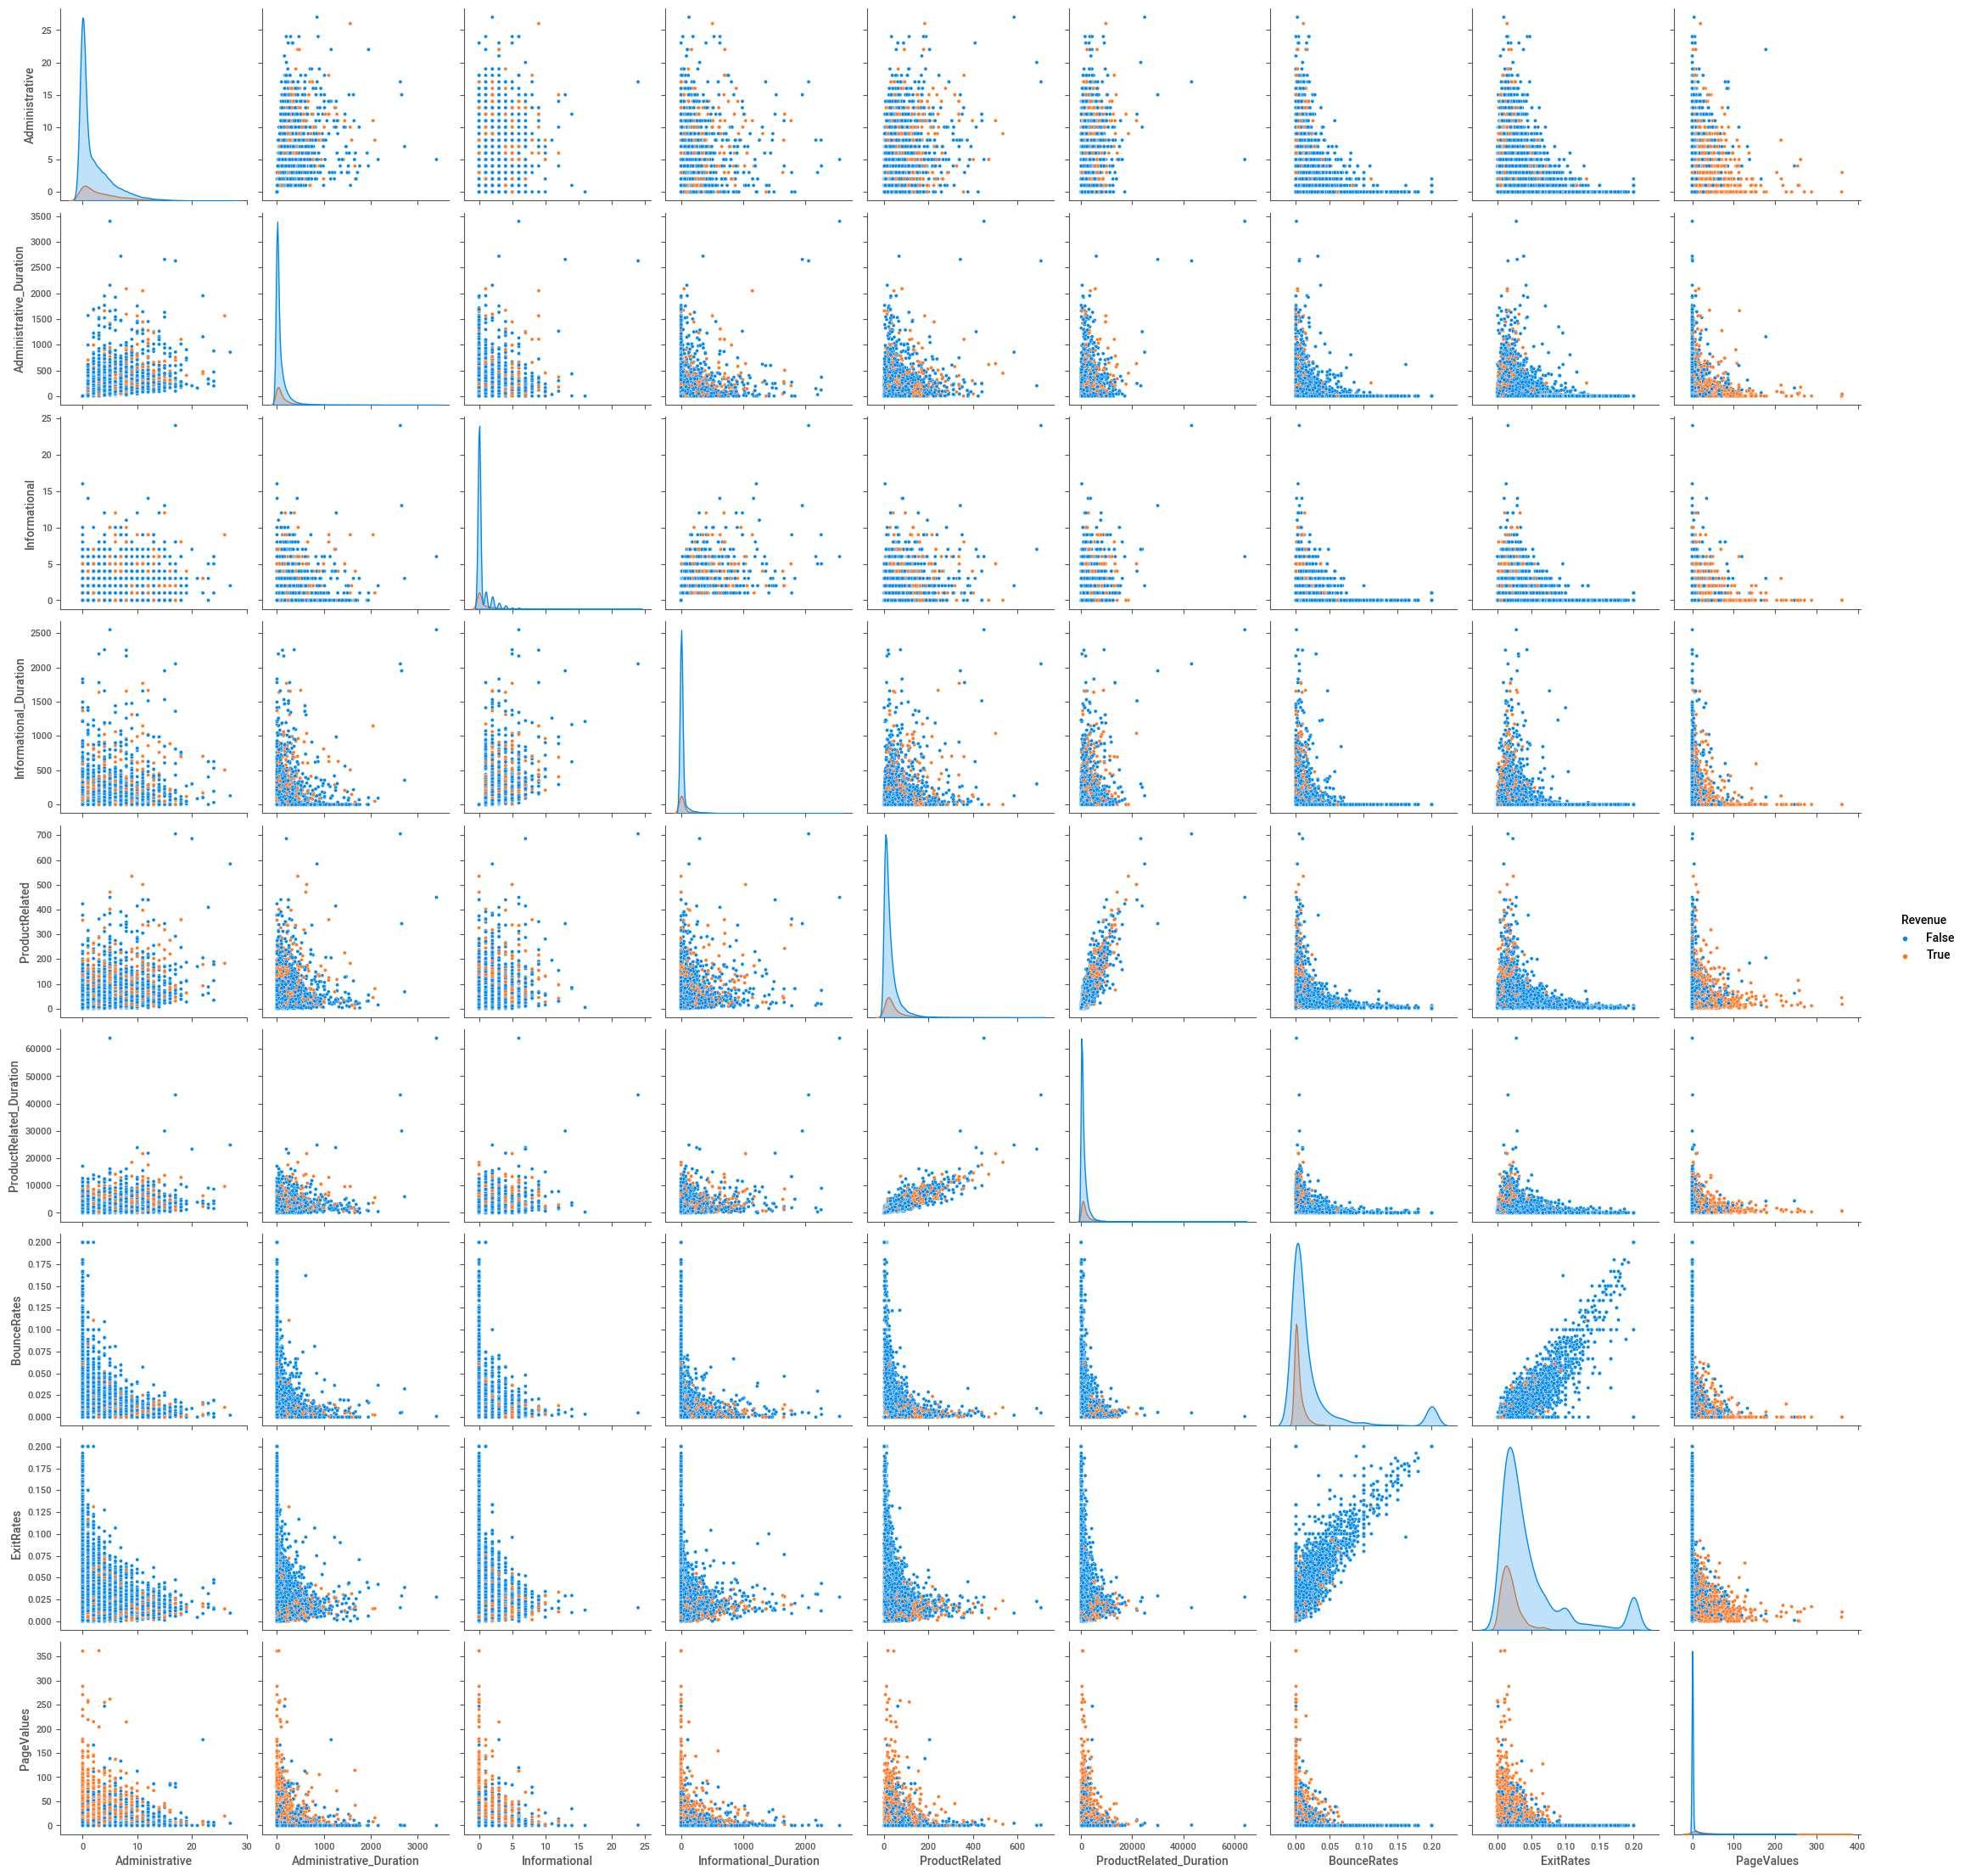

In [11]:
sns.pairplot(df[numerical + [label]], hue=label) 
plt.show()

#### 1.3 Train test split
Again, 10% of data for validation subset should be enough

In [12]:
df_train, df_valid = train_test_split(df, test_size=0.1, stratify=df.Revenue, random_state=42)

#### Feature selection
I am going to use sci-kit learn pipelines here.

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


numeric_features = [
    'Administrative', 'Administrative_Duration', 
    'Informational', 'Informational_Duration', 
    'ProductRelated', 'ProductRelated_Duration',
     'BounceRates', 'ExitRates', 'PageValues',
    ]
categorical_features = [
    'Browser', 'Month', 'Region', 'OperatingSystems', 'SpecialDay', 'VisitorType', 'Weekend'
]

label = 'Revenue'


numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")), 
    ("scaler", StandardScaler())
    
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')


from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)



In [14]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight = 'balanced', max_iter=500)
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("model", lr_model)]
)

model.fit(df_train, df_train[label])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                               

In [15]:
from sklearn.metrics import classification_report
print ('Results for train subset:')
print (classification_report(df_train[label], model.predict(df_train)))
print ('Results for validation subset:')
print (classification_report(df_valid[label], model.predict(df_valid)))



Results for train subset:
              precision    recall  f1-score   support

       False       0.96      0.88      0.91      8442
        True       0.54      0.78      0.63      1545

    accuracy                           0.86      9987
   macro avg       0.75      0.83      0.77      9987
weighted avg       0.89      0.86      0.87      9987

Results for validation subset:
              precision    recall  f1-score   support

       False       0.94      0.87      0.90       938
        True       0.49      0.70      0.58       172

    accuracy                           0.84      1110
   macro avg       0.72      0.78      0.74      1110
weighted avg       0.87      0.84      0.85      1110



Random forest classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100, min_samples_leaf=15)

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("model", rf_model)]
)

model.fit(df_train, df_train[label])


print ('Results for train subset:')
print (classification_report(df_train[label], model.predict(df_train)))
print ('Results for validation subset:')
print (classification_report(df_valid[label], model.predict(df_valid)))

Results for train subset:
              precision    recall  f1-score   support

       False       0.93      0.98      0.95      8442
        True       0.86      0.57      0.69      1545

    accuracy                           0.92      9987
   macro avg       0.89      0.78      0.82      9987
weighted avg       0.92      0.92      0.91      9987

Results for validation subset:
              precision    recall  f1-score   support

       False       0.91      0.98      0.95       938
        True       0.84      0.48      0.61       172

    accuracy                           0.91      1110
   macro avg       0.88      0.73      0.78      1110
weighted avg       0.90      0.91      0.89      1110



Supervised training is done, so we may check the final performence of our best model (Radom Forest)

In [18]:
print ('Results for TEST subset:')
print (classification_report(df_test[label], model.predict(df_test)))

Results for TEST subset:
              precision    recall  f1-score   support

       False       0.91      0.98      0.94      1042
        True       0.77      0.46      0.57       191

    accuracy                           0.89      1233
   macro avg       0.84      0.72      0.76      1233
weighted avg       0.89      0.89      0.88      1233



## Task 2 - Customer Segmentation

#### 2.1 How many clusters do you see? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. Perform as detailed analysis of the clusters as you can.

Before we do the clustering, it is usually a good idea select inputs make sure that everything is pretty much in the same scale, deal with categorical features, nans, etc. Luckily, I already have a pipeline that does all these things. 

*Truth to say, sk-learn pipelines are amazing. This is the most useful thing that I learned during the first half of the course :). I am using them all the time now.*


100%|██████████| 14/14 [05:41<00:00, 24.39s/it]


<AxesSubplot:xlabel='no. of clusters'>

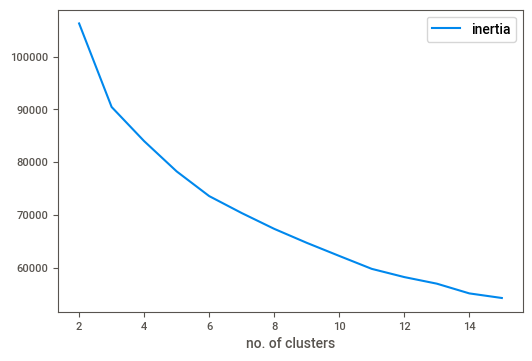

In [46]:
from sklearn.cluster import KMeans
from tqdm import tqdm

inertias = []
cluster_range = range(2, 16)

for n_clusters in tqdm(cluster_range):
    km_model = KMeans(n_clusters = n_clusters)

    model = Pipeline(
        steps=[
            ("preprocessor", preprocessor), 
            ("model", km_model)]
    )

    model.fit(df)
    inertias.append(model['model'].inertia_)

tmp = pd.DataFrame()
tmp['no. of clusters'] = list(cluster_range)
tmp['inertia'] = inertias
tmp.plot(x = 'no. of clusters', y = 'inertia')


There are two potential elbows, 6 and 11. I'll go with 6, the less clusters the better. 

In [52]:
km_model = KMeans(n_clusters = 6)

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("model", km_model)]
)

clusters = model.fit_predict(df_train)

count  RevenueRate       std  min  25%  50%  75%  max  Perc_elems
cluster                                                                    
0         294.0     0.343537  0.475699  0.0  0.0  0.0  1.0  1.0    2.943827
1        6402.0     0.096376  0.295129  0.0  0.0  0.0  0.0  1.0   64.103334
2         414.0     0.258454  0.438315  0.0  0.0  0.0  1.0  1.0    4.145389
3        1672.0     0.202751  0.402169  0.0  0.0  0.0  0.0  1.0   16.741764
4         466.0     0.806867  0.395181  0.0  1.0  1.0  1.0  1.0    4.666066
5         739.0     0.006766  0.082032  0.0  0.0  0.0  0.0  1.0    7.399620

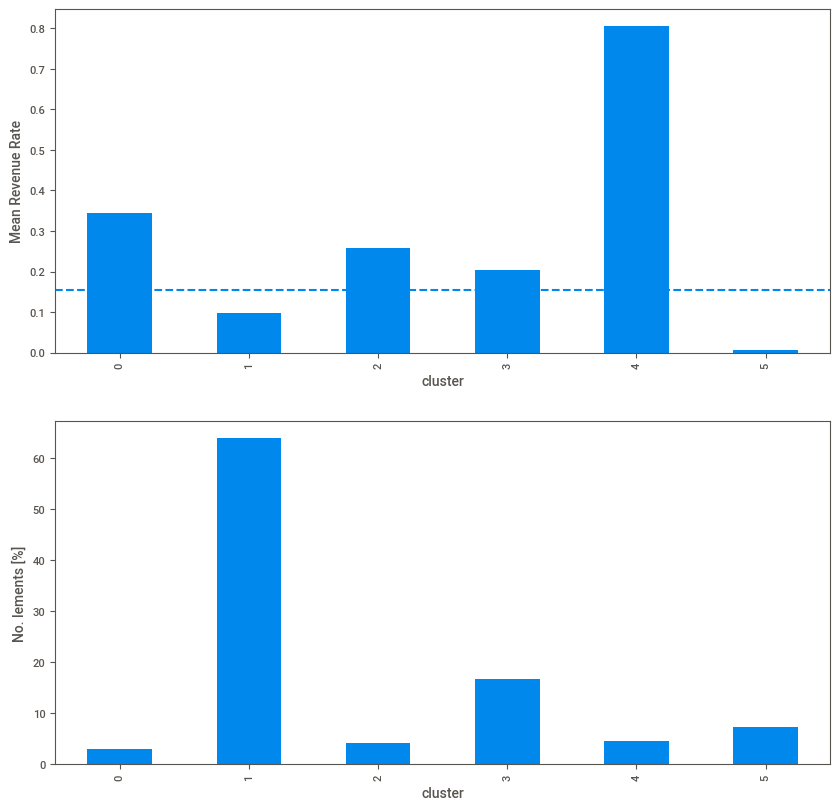

In [98]:
cluster_df = df_train.copy()
cluster_df['cluster'] = clusters
cluster_df.Revenue = cluster_df.Revenue.astype(int)

def agg_clusterdf(df):
    ret = df[['cluster', 'Revenue']].groupby('cluster').describe()
    ret.columns = ['count', 'RevenueRate', 'std', 'min', '25%', '50%', '75%', 'max']
    ret['Perc_elems'] = 100 * ret['count'] / len(df)
    return ret

def agg_and_plot(df):
    """
    Plots nice barcharts and returns aggregated dataset
    Arguments:
        df - aggregated dataframe, output from agg_clusterdf function

    """
    agg_df = agg_clusterdf(df)

    plt.figure(figsize=(10, 10))
    plt.subplot(211)
    agg_df['RevenueRate'].plot.bar()
    plt.ylabel('Mean Revenue Rate')
    plt.axhline(df.Revenue.mean(), ls='dashed')

    plt.subplot(212)
    agg_df['Perc_elems'].plot.bar()
    plt.ylabel('No. lements [%]')

    return agg_df

agg_and_plot(cluster_df)

In [100]:
def agg_and_plot(df):
    """
    Plots nice barcharts and returns aggregated dataset
    Arguments:
        df - aggregated dataframe, output from agg_clusterdf function

    """
    agg_df = agg_clusterdf(df)

    plt.figure(figsize=(10, 10))
    plt.subplot(211)
    agg_df['RevenueRate'].plot.bar()
    plt.ylabel('Mean Revenue Rate')
    plt.axhline(df_train.Revenue.mean(), ls='dashed')

    plt.subplot(212)
    agg_df['Perc_elems'].plot.bar()
    plt.ylabel('No. lements [%]')

    return agg_df


Overall, it is already useful. Of course, the significant clusters (like 4 or 5) are relatively small, but it was to be expected with imbalanced dataset.
I think it still may be improved, however, we may already make some conclusions

- Most of the data points should fall into the largest cluster (1). They are generally not that interesting - the revenue rate is smaller than the mean.
- Cluster 4 is extremely interesting to us. If something is in cluster 4, there is 80% chance to generate a revenue from it
- Cluster 5 is also interesting, it points out 'hopeless products'
- Clusters 0, 2 and 3 are above average. They may require additional analysis or reclustering, but (especially in cluster 0) they point out that produtcts that may be worth of considering.

#### Tests
To validate the approach above, let's see if we can get similar results for the test dataset.
This time I wanted to have more data, so I will use both valid and test subsets for testing

count  RevenueRate       std  min  25%  50%  75%  max  Perc_elems
cluster                                                                    
0          75.0     0.386667  0.490266  0.0  0.0  0.0  1.0  1.0    3.201024
1        1484.0     0.098383  0.297932  0.0  0.0  0.0  0.0  1.0   63.337601
2          91.0     0.307692  0.464095  0.0  0.0  0.0  1.0  1.0    3.883910
3         410.0     0.192683  0.394888  0.0  0.0  0.0  0.0  1.0   17.498933
4          97.0     0.835052  0.373062  0.0  1.0  1.0  1.0  1.0    4.139991
5         186.0     0.000000  0.000000  0.0  0.0  0.0  0.0  0.0    7.938540

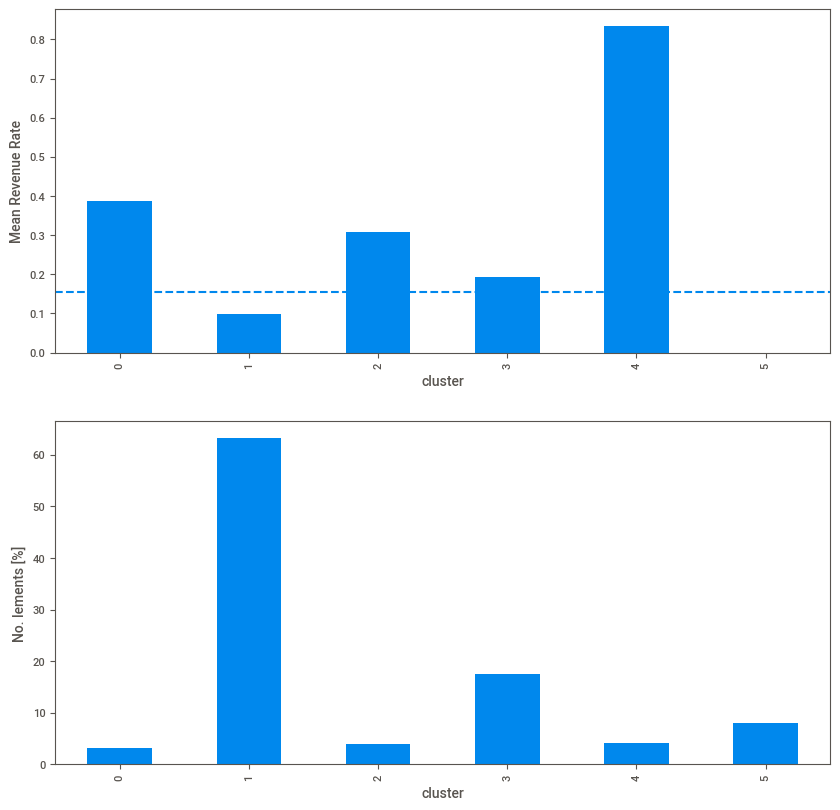

In [101]:
t_cluster_df = pd.concat([df_valid, df_test])
t_cluster_df['cluster'] = model.predict(t_cluster_df)
t_cluster_df.Revenue = t_cluster_df.Revenue.astype(int)
agg_and_plot(t_cluster_df)


#### Test results and Conclusions
It went better than I expected, the results are stable also for the test subset. Cool :).

## 3. Semi-Supervised Learning
#### 3.1 Create train / test datasets

In [127]:
label = 'Revenue'
gt_label = 'RealRevenue'

labeled_months = ['June', 'Jul', 'Aug', 'Sep']
unlabeled_months = ['Oct', 'Nov', 'Dec']
test_months = ['Feb', 'Mar']

ss_data = df_raw[df_raw.Month.isin(labeled_months + unlabeled_months)].copy()
ss_data[label] = ss_data[label].astype(int)
ss_data[gt_label] = ss_data[label]


ss_data.loc[ss_data.Month.isin(unlabeled_months), label] = -1
print ('ss_data revenue value counts:')
print (ss_data[label].value_counts())

ss_test = df_raw[df_raw.Month.isin(test_months)].copy()
ss_test[label] = ss_test[label].astype(int)
ss_test.rename(columns = {label : gt_label}, inplace=True)


print ('ss_data cols: ', ss_data.columns)
print ('ss_test cols: ', ss_test.columns)



ss_data revenue value counts:
-1    5274
 0    1344
 1     257
Name: Revenue, dtype: int64
ss_data cols:  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'RealRevenue'],
      dtype='object')
ss_test cols:  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'RealRevenue'],
      dtype='object')


- We need slightly different pipeline now. As Month data in labeled, unlabeled, and test data do not intersect, I exclude month from the dataset. Everything else remains the same (for now). I also changed Standard Scaler into normalizer, to avoid numerical instabilities (division by zero).


In [216]:
from sklearn.preprocessing import Normalizer

ss_categorical_features = [
    'Browser', 'Region', 'OperatingSystems', 'SpecialDay', 'VisitorType', 'Weekend'
]

ss_categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ss_numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")), 
    ("scaler", Normalizer())
    
])

from sklearn.compose import ColumnTransformer

ss_preprocessor = ColumnTransformer(
    transformers=[
        ("num", ss_numeric_transformer, numeric_features),
        ("cat", ss_categorical_transformer, ss_categorical_features),
    ]
)


In [248]:
from sklearn.semi_supervised import LabelSpreading

ls_model = LabelSpreading(kernel='rbf', gamma=30, alpha=0.01)

model = Pipeline(
    steps=[
        ("preprocessor", ss_preprocessor), 
        ("model", ls_model)]
)

model.fit(ss_data, ss_data[label])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   Normalizer())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   

In [249]:
pred =ls_model.transduction_
ss_data['pred'] = pred
tmp = ss_data[ss_data.Month.isin(unlabeled_months)]
print (classification_report(tmp[gt_label], tmp['pred']))


              precision    recall  f1-score   support

           0       0.80      0.95      0.87      4183
           1       0.31      0.09      0.13      1091

    accuracy                           0.77      5274
   macro avg       0.55      0.52      0.50      5274
weighted avg       0.70      0.77      0.72      5274



***Note: These results are really shitty. I managed to push it higher, but in this case I got NaN label distributions. This is a well-known error (https://github.com/scikit-learn/scikit-learn/issues/9292). It is probably possible to solve it by defining my own "safe" kernel, but the deadline is coming, so I am leaving it as is. I do not expect any improvements from features produced by this model, though.**

In [250]:
ss_test['pred'] = model.predict(ss_test)

### New models with and without predicted labels

First without the 'pred' column



In [253]:
from sklearn.ensemble import RandomForestClassifier


def test_rf_model(categorical_features):

    categorical_transformer = OneHotEncoder(handle_unknown='ignore')


    preprocessor = ColumnTransformer(
        transformers=[
            ("num", ss_numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ]
    )

    rf_model = RandomForestClassifier(n_estimators = 10, min_samples_leaf=15)
    base_model = Pipeline(
        steps=[
            ("preprocessor", preprocessor), 
            ("model", rf_model)]
    )

    base_model.fit(ss_data, ss_data[gt_label])


    print (classification_report(ss_test[gt_label], base_model.predict(ss_test)))



test_rf_model([
    'Browser', 'Region', 'OperatingSystems', 'SpecialDay', 'VisitorType', 'Weekend'
])


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1896
           1       0.76      0.52      0.62       195

    accuracy                           0.94      2091
   macro avg       0.85      0.75      0.79      2091
weighted avg       0.93      0.94      0.93      2091



And now, with additional 'pred' column

In [254]:
test_rf_model([
    'Browser', 'Region', 'OperatingSystems', 'SpecialDay', 'VisitorType', 'Weekend', 'pred'
])


              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1896
           1       0.68      0.33      0.45       195

    accuracy                           0.92      2091
   macro avg       0.81      0.66      0.70      2091
weighted avg       0.91      0.92      0.91      2091



#### Conclusions
The new feature did not help at all. If anything, it makes everything worse. This is due to the very poor results of LabelSpreading model. I cannot work on this any longer (deadline).
Please, provide an extended feedback for this particular task, if possible. Thanks.